In [28]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [75]:
import numpy as np
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
## define training dataset
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

In [4]:
## train model
model = Word2Vec(sentences,min_count = 1)

In [6]:
## summarize model
print(model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)


In [20]:
model.wv.key_to_index.keys()

dict_keys(['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first'])

In [11]:
len(model.wv) 

14

In [14]:
model.wv['sentence']

array([-5.3622725e-04,  2.3643016e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588715e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633730e-03,  7.3805046e-03, -1.5334726e-03,
       -4.5366143e-03,  6.5540504e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488189e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508893e-03, -3.4053659e-03, -9.4640255e-04,  5.7685734e-03,
       -7.5216386e-03, -3.9361049e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337698e-03, -1.9377422e-03,
        8.0774352e-03, -5.9308959e-03,  4.5161247e-05, -4.7537349e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595871e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618264e-04, -7.6612402e-03,  9.6147414e-03,
        4.9820566e-03,  9.2331432e-03, -8.1579182e-03,  4.4957972e-03,
       -4.1370774e-03,  8.2453492e-04,  8.4986184e-03, -4.4621779e-03,
      

In [24]:
model.wv.index_to_key

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [27]:
## Access the model vocabulary.
X = model.wv[model.wv.index_to_key]

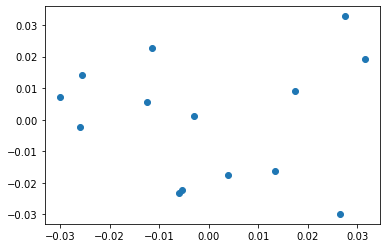

In [29]:
## Plot Word Vectors Using PCA
## We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
## as follows.

pca = PCA(n_components = 2)
result = pca.fit_transform(X)
pyplot.scatter(result[:,0],result[:,1])

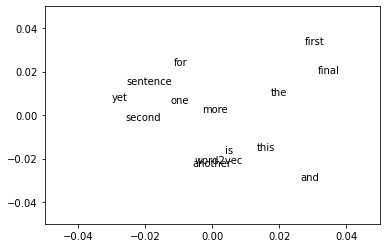

In [35]:
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy = (result[i,0],result[i,1]))
    # set a range on the plot's axis
    pyplot.ylim(-0.05, 0.05)
    pyplot.xlim(-0.05, 0.05)
pyplot.show()

In [36]:
from gensim.models import KeyedVectors

In [38]:
filename = 'GoogleNews-vectors-negative300.bin'

In [39]:
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [40]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

In [41]:
result

[('queen', 0.7118193507194519)]

In [42]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [44]:
glove_input_file = "glove.6B.100d.txt"
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file,word2vec_output_file)

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


(400000, 100)

In [45]:
## load the stanford glove model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename , binary = False)
## check example
result = model.most_similar(positive = ['woman','king'],negative = ['man'] , topn = 1)
print(result)

[('queen', 0.7698540687561035)]


In [46]:
### Example of Learning an Embedding

In [51]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [47]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']

In [48]:
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

In [50]:
## integer encode 
vocab_size = 50
encoded_docs = [one_hot(d,vocab_size) for d in docs]
print(encoded_docs)

[[48, 17], [39, 40], [24, 30], [37, 40], [1], [29], [27, 30], [14, 39], [27, 40], [20, 45, 17, 27]]


In [54]:
max_length = 4
padded_docs = pad_sequences(encoded_docs , maxlen = max_legnth,padding = "post")
print(padded_docs)

[[48 17  0  0]
 [39 40  0  0]
 [24 30  0  0]
 [37 40  0  0]
 [ 1  0  0  0]
 [29  0  0  0]
 [27 30  0  0]
 [14 39  0  0]
 [27 40  0  0]
 [20 45 17 27]]


In [55]:
## build the model
model = Sequential()
model.add(Embedding(vocab_size , 8 , input_length = max_length))
model.add(Flatten())
model.add(Dense(1,activation = "sigmoid"))

## compile the model
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = 'accuracy')

## summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [58]:
type(padded_docs)

numpy.ndarray

In [62]:
labels = np.array(labels)

In [63]:
## fit the model
model.fit(padded_docs , labels , epochs = 50 , verbose = 0)

## evaluate the model
loss, accuracy = model.evaluate(padded_docs , labels , verbose = 0)


In [64]:
print("Accuracy : %f "% (accuracy * 100))

Accuracy : 80.000001 


In [68]:
## load the whole embedding into memory

embedding_index = dict()
f = open("glove.6B.100d.txt", encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs
f.close()

In [69]:
print('Loaded %s word vectors.' % len(embedding_index))

Loaded 400000 word vectors.


In [70]:
len(values)

101

In [71]:
word

'sandberger'

In [76]:
## prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

In [78]:
vocab_size = len(tokenizer.word_index) +1 

In [79]:
encoded_docs = tokenizer.texts_to_sequences(docs)

In [80]:
encoded_docs

[[6, 2],
 [3, 1],
 [7, 4],
 [8, 1],
 [9],
 [10],
 [5, 4],
 [11, 3],
 [5, 1],
 [12, 13, 2, 14]]

In [81]:
max_length = 4
padded_docs = pad_sequences(encoded_docs,maxlen = max_length , padding = 'post')

In [82]:
padded_docs

array([[ 6,  2,  0,  0],
       [ 3,  1,  0,  0],
       [ 7,  4,  0,  0],
       [ 8,  1,  0,  0],
       [ 9,  0,  0,  0],
       [10,  0,  0,  0],
       [ 5,  4,  0,  0],
       [11,  3,  0,  0],
       [ 5,  1,  0,  0],
       [12, 13,  2, 14]])

In [85]:
## create weight matrix for words in training docs
embedding_matrix = zeros((vocab_size , 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [87]:
embedding_matrix.shape

(15, 100)

In [89]:
## define model
model = Sequential()
embedding_layer = Embedding(vocab_size,100 , weights = [embedding_matrix],input_length = 4 ,trainable=False )
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation = "sigmoid"))

In [93]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = 'accuracy')

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            1500      
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 401       
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________


In [95]:
model.fit(padded_docs , labels , epochs = 50,verbose = 0)

In [96]:
## evaluate the model
loss, accuracy = model.evaluate(padded_docs , labels , verbose = 0)

In [98]:
print(accuracy * 100)

100.0
